## Import Libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plot
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

## 1. Load and explore data

In [3]:
df = pd.read_csv('data/LoanEligibility.csv')  # load the csv file as a pandas dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.shape # checking the no. of rows and columns in data

(614, 13)

In [4]:
df.columns # give names of all columns (instead of shape and column info can be used as below)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info() # it will give more information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe() # gives insights for the numerical datas

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## 2. Process or clean the data

2.1 Remove duplicates

In [88]:
df.drop_duplicates()  # remove duplicate from data (there is no duplicates)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


2.2 Delete unnecessary columns

In [89]:
# df.drop('column_name',axis=1,inplace= True) # no column need to be deleted as all features are imp
# Also check the values of Categorical columns with different values meaning same and Data Normalization

2.3 Handle missing Values

In [90]:
pd.isnull(df).sum() # checking the missing values 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
# Gender has 13 missing values
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [92]:
# We can see that the majority is Male so we will replace the missing values by mode of the values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [93]:
# Married has 3 missing values
df['Married'].value_counts() #the difference between the count is not much so we cant use mode

Yes    398
No     213
Name: Married, dtype: int64

In [94]:
df[pd.isnull(df['Married'])]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [95]:
# after observing we can replace the missing value to yes where 'coapplicantincome is present and no otherwise
df['temp'] = np.where(df.CoapplicantIncome == 0.0, 'No', 'Yes')
df['Married'] = df.Married.fillna(df.temp)
df.drop('temp', axis=1, inplace=True)

In [96]:
# Dependents has 15 missing values
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [97]:
# if married is no replace with 0 else replace 1
df['temp'] = np.where(df.Married == 'No', 0, 1)
df['Dependents'] = df.Dependents.fillna(df.temp)
df.drop('temp', axis=1, inplace=True)

In [98]:
# Self_Employed has 32 missing values
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [99]:
# replace with the mode
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [100]:
# LoanAmount has 32 missing values also for LoanAmountTerm
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [101]:
# replace with the mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
# replace with the mean
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [102]:
# Credit_History has 50 missing values
df_lep['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [103]:
# replace with the mean
df_lep['Credit_History'].fillna(df_lep['Credit_History'].mean(), inplace=True)

In [104]:
pd.isnull(df_lep).sum()   # filled all missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

2.4 Check any date time categories convert to datetime datatype

## 3. Exploratory Data Analysis

3.1 Target Exploration

In [105]:
df_lep['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [106]:
df_lep['Loan_Status'].describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

3.2 Univariate Visualizations

In [107]:
df_lep.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Text(0, 0.5, 'Frequency')

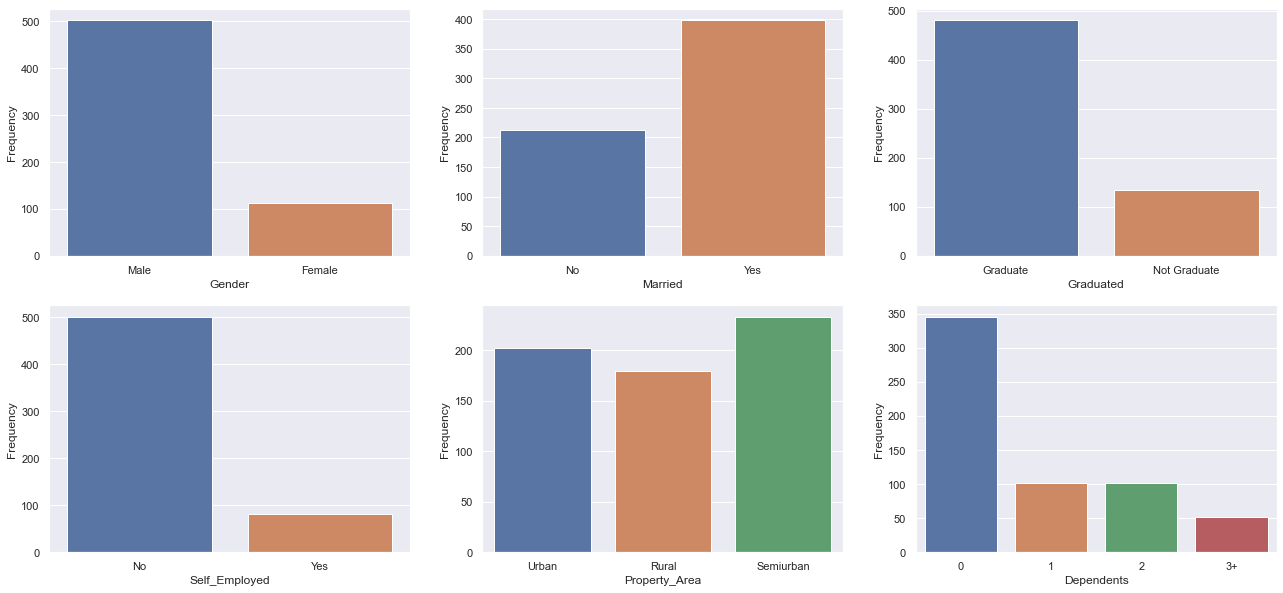

In [128]:
# first visualize binary and discrete features
plot.figure(figsize=(22,10))

# Gender - plot a bar chart
plot.subplot(2,3,1)
sns.countplot(df_lep['Gender'])
plot.xlabel('Gender')
plot.ylabel('Frequency')

# Married - plot a bar chart
plot.subplot(2,3,2)
sns.countplot(df['Married'])
plot.xlabel('Married')
plot.ylabel('Frequency')

# Education - plot a bar chart
plot.subplot(2,3,3)
sns.countplot(df['Education'])
plot.xlabel('Graduated')
plot.ylabel('Frequency')

# Self_Employed - plot a bar chart
plot.subplot(2,3,4)
sns.countplot(df['Self_Employed'])
plot.xlabel('Self_Employed')
plot.ylabel('Frequency')

# Property_Area - plot a bar chart
plot.subplot(2,3,5)
sns.countplot(df['Property_Area'])
plot.xlabel('Property_Area')
plot.ylabel('Frequency')

# Dependents - plot a bar chart
plot.subplot(2,3,6)
sns.countplot(df['Dependents'])
plot.xlabel('Dependents')
plot.ylabel('Frequency')

3.3 Bivariate with Target Visualization /Multivariate

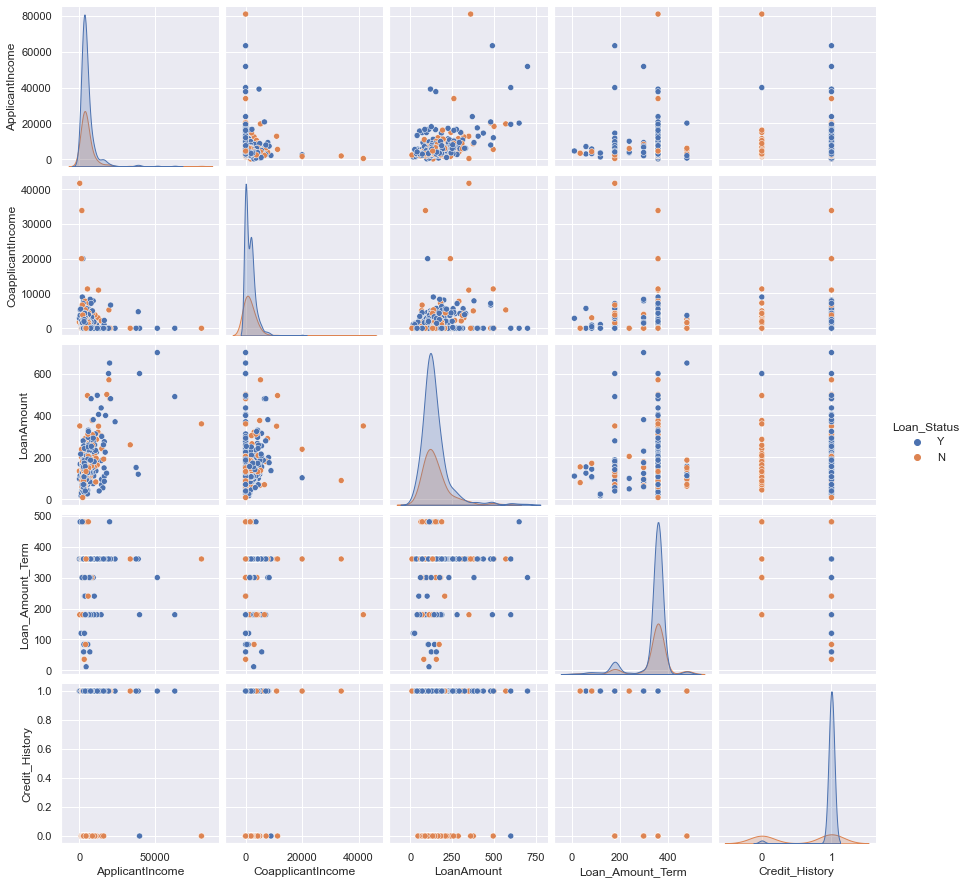

In [131]:
sns.pairplot(df, hue='Loan_Status')

3.4 Correlation Heat Map

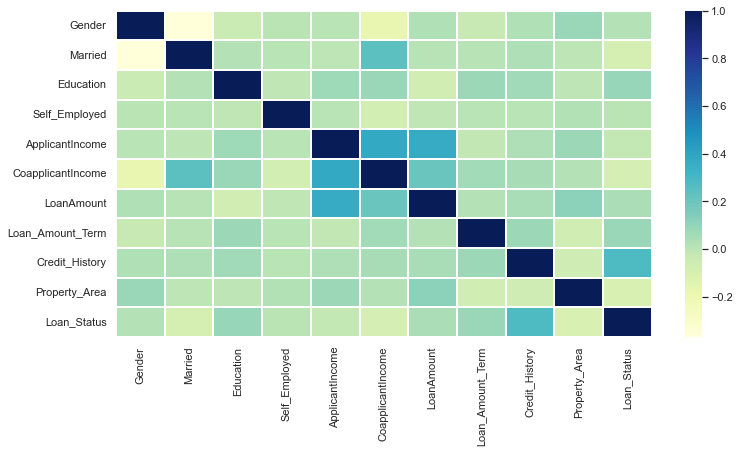

In [133]:
plot.figure(figsize=(12, 6))
df_n = df_lep.drop(['Loan_ID', 'Dependents'], axis=1)
corr = df_n.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

##  Conclusions of EDA

1. Majority of Loan applicants are Male, Graduated and no depenants
2. Credit History has a major influence on the Loan status
3. Applicant income also has an influence but coopplicants income doesnt seem to affect much
4. Loan amount alone also doesnt show much effect
5. Applicant income correlated with Coapplicant income and Applicant income correlated with Loan amount shows effect